### Student Performance in Exams 

**Hangi veri seti seçildi?**

Veri seti, Kaggle üzerinde yer alan "Students Performance in Exams" veri setidir. Veri seti, ebeveynlerin geçmişinin, sınav hazırlığının vb. öğrencilerin performansı üzerindeki etkisini anlamaktır.

Students Performance in Exams Link: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

**Problemin amacı nedir? Hedef değişken nedir?**

Bu veri seti öğrencilerin çeşitli derslerde aldıkları notlardan oluşmaktadır. Ebeveynlerin geçmişinin, sınav hazırlığının vb. öğrencilerin performansı üzerindeki etkisini anlamak.

Hedef değişken: math score, reading score, writing score (Bu veri seti özelinde bir tanesi ele alınacaktır. math score hedef değişken olarak seçilecektir. Diğer 2 hedef değişken veriden düşürülecektir.)

In [24]:
# Gerekli kütüphanelerin import edilmesi

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# CSV formatındaki veri setinin projeye dahil edilmesi ve bir DataFrame olarak projeye dahil edilmesi

df = pd.read_csv("StudentsPerformance.csv")

In [26]:
# Verinin ilk 5 satırını getirelim

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**Veri setini daha yakından tanımak amacıyla tüm columnların ne anlama geldiğini daha detaylı açıklayalım.**

- **gender**: Öğrencinin cinsiyeti (female veya male)

- **race/ethnicity**: Öğrencinin ırksal/etnik kökeni (group A, group B, group C, group D, group E)

- **parental level of education**: Öğrencinin ebeveynlerinden birinin eğitim seviyesi (some college, associate's degree, high school, some high school, bachelor's degree, master's degree) 

- **lunch**: Öğrencinin okulda aldığı öğle yemeği türü (standard veya free/reduced)

- **test preparation course**: Öğrencinin sınav hazırlık kursunu tamamlayıp tamamlamadığı (none veya completed)

- **math score**: Öğrencinin matematik sınavındaki puanı (0 ile 100 arasında tam sayı)

- **reading score**: Öğrencinin okuma sınavındaki puanı (0 ile 100 arasında tam sayı)

- **writing score**: Öğrencinin yazma sınavındaki puanı (0 ile 100 arasında tam sayı)

**NOT: Bu veri seti özelinde bir tanesi ele alınacaktır. math score hedef değişken olarak seçilecektir. Diğer 2 hedef değişken veriden düşürülecektir.**

In [27]:
# Verinin son 5 satırını getirelim

df.tail(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [28]:
# Veri setinin boyut bilgisine erişip, satır ve sütun bilgilerini getirelim

df.shape

(1000, 8)

**Yorumlayalım:** Veri seti toplamda 920 satır ve 16 sütundan oluşmaktadır.

In [29]:
# Verinin istatistiksel dağılımını inceleyelim

df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**Yorumlayalım:**
Gözlem sayısı (count): Her üç değişken için de 1000 veri noktası var. Eksik veri yok.

- Ortalama (mean):
    - Math score: 66.1
    - Reading score: 69.2
    - Writing score: 68.1
  
    Öğrenciler genel olarak en yüksek puanı "okuma", en düşük puanı ise "matematik" testinden almış.

- Dağılım (Standard Sapma - std)
    - Math: 15.16
    - Reading: 14.60
    - Writing: 15.20

    Üç alanda da puanlar benzer şekilde dağılmış. Ortalama etrafındaki yayılım birbirine yakın.

- Minimum ve Maksimum
    - Min Puanlar:

        - Math: 0 (en düşük)
        - Reading: 17
        - Writing: 10

        Matematikte 0 alan öğrenciler var; bu oldukça düşük ve dikkat çekici.

    - Max Puanlar: Tüm alanlarda 100, yani en yüksek puanı alan öğrenciler var.


- Medyan değerler ortalamaya çok yakın, bu da dağılımın simetrik olduğunu gösterir.

- 25% ve 75% arasındaki fark da yaklaşık 20 puan, bu da verinin orta kısmında geniş bir dağılım olduğunu gösterir.

**Genel Yorum:**

- Veriler oldukça dengeli ve normal dağılıma yakın.
- Matematikte bazı çok düşük puanlar mevcut (0 puan), bu uç değerler ortalamayı biraz aşağı çekiyor olabilir.
- Okuma ve yazma skorları birbirine çok benzer, aralarında güçlü bir korelasyon olabileceğini düşündürür.



In [30]:
# Veri hakkında detaylı bilgileri getirelim.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


**Yorumlayalım**
- Verimizde 1000 gözlem bulunmaktadır.

- Toplamda 8 column bulunmaktadır. Bunlardan 3 tanesi int64 tipinde, 5 tanesi object tipindedir.

- Columnlarda eksik veri bulunmamaktadır.

In [31]:
# Eksik değer analizi

df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

**Yorumlayalım:** Eksik veri bulunmamaktadır.

In [32]:
# Label-Encoder için gerekli kütüphanelerin yüklenmesi

from sklearn.preprocessing import LabelEncoder

In [33]:
le = LabelEncoder()                  # LabelEncoder nesnesi oluştur

df['gender_label'] = le.fit_transform(df['gender'])    # 'gender' sütununu sayısal değerlere dönüştür ve yeni sütun olarak ekle
df['lunch_label'] = le.fit_transform(df['lunch'])    # 'lunch' sütununu sayısal değerlere dönüştür ve yeni sütun olarak ekle
df['test_preparation_course_label'] = le.fit_transform(df['test preparation course'])# 'exang' sütununu sayısal değerlere dönüştür ve yeni sütun olarak ekle

In [34]:
# One-Hot-Encoding yöntemi ile kategorik veriyi sayısala çeviriyoruz. drop_first ile ilk sütunu düşürüyoruz.

df = pd.get_dummies(df, columns=['race/ethnicity', 'parental level of education'], drop_first=True, dtype='int64')

In [35]:
df

,gender,lunch,test preparation course,math score,reading score,writing score,gender_label,lunch_label,test_preparation_course_label,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school
0,female,standard,none,72,72,74,0,1,1,1,0,0,0,1,0,0,0,0
1,female,standard,completed,69,90,88,0,1,0,0,1,0,0,0,0,0,1,0
2,female,standard,none,90,95,93,0,1,1,1,0,0,0,0,0,1,0,0
3,male,free/reduced,none,47,57,44,1,0,1,0,0,0,0,0,0,0,0,0
4,male,standard,none,76,78,75,1,1,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,standard,completed,88,99,95,0,1,0,0,0,0,1,0,0,1,0,0
996,male,free/reduced,none,62,55,55,1,0,1,0,1,0,0,0,1,0,0,0
997,female,free/reduced,completed,59,71,65,0,0,0,0,1,0,0,0,1,0,0,0
998,female,standard,completed,68,78,77,0,1,0,0,0,1,0,0,0,0,1,0


**Yorum:**

- gender_label >> female = 0, male = 1
- lunch_label >> free/reduced = 1, standard = 0
- test_preparation_course_label >> none = 1, completed = 0

Görüldüğü üzere, Label Encoder kullanarak gender sütunundaki kategorik değerleri sayısal değerlere dönüştürdük.

In [36]:
# Belirtilen sütunları veri setinden düşürme

df = df.drop(['gender', 'lunch', 'test preparation course', 'reading score', 'writing score'], axis=1)

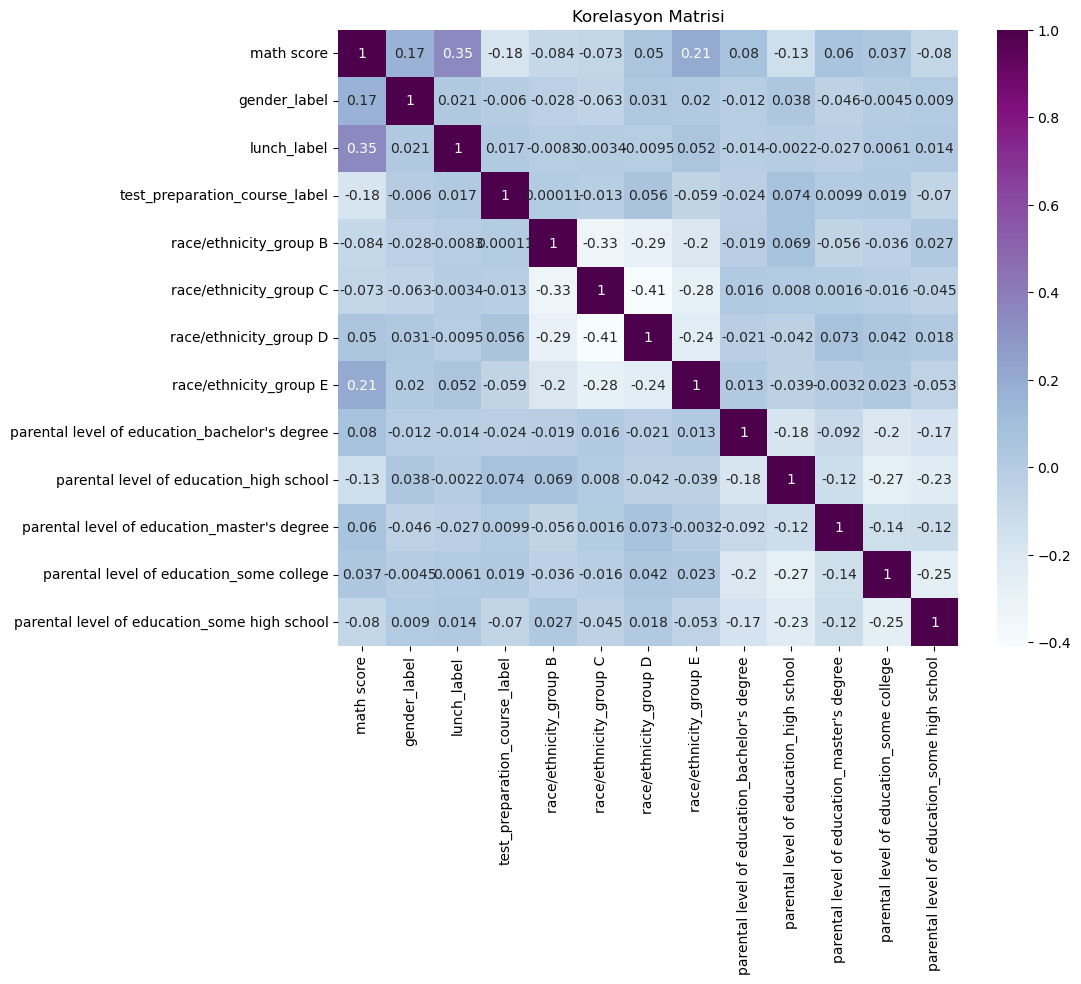

In [37]:
# Korelasyon Analizi

# Korelasyon Isı Haritası (heatmap)
plt.figure(figsize=(10, 8))  # Grafik boyutunu (en x boy) ayarla
sns.heatmap(
    df.corr(numeric_only=True),  # Sayısal sütunlar arasındaki korelasyon matrisini hesapla
    annot=True,                  # Hücrelerin içine korelasyon değerlerini yazdır
    cmap='BuPu'              # Renk paletini 'soğuk-sıcak' olarak ayarla
)
plt.title("Korelasyon Matrisi")  # Grafiğe başlık ekle
plt.show()                      # Grafiği ekranda göster

**Korelasyon Yorumlama:**

- Genellikle negatif korelasyonlar mevcuttur.

- lunch_label-math score ve race/ethnicity_group E- math score = aralarında orta seviyeye yakın pozitif korelasyonlar vardır.

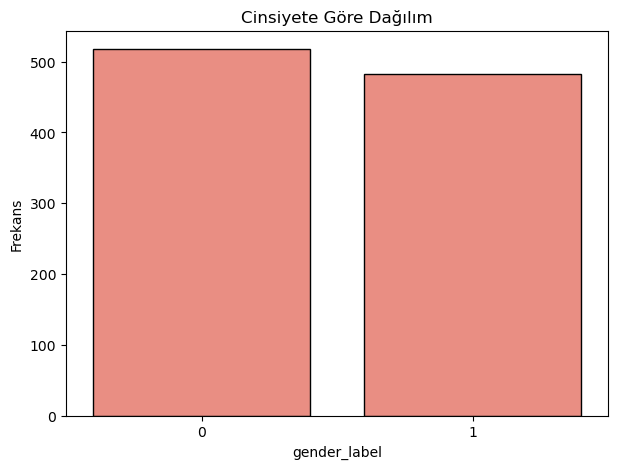

In [38]:
# Gender dağılımına bakalım.

plt.figure(figsize=(7, 5))  # Grafik boyutunu genişlik x yükseklik olarak ayarla

sns.countplot(x= df["gender_label"],            # 'gender' sütunundaki verilerin countplot'unu çiz     
            color='salmon',               # Çubukların rengi
            edgecolor='black'             # Çubuk kenarlarının rengi
)

plt.title("Cinsiyete Göre Dağılım")
plt.xlabel("gender_label")            # X ekseni etiketi
plt.ylabel("Frekans")           # Y ekseni etiketi
plt.show()                      # Grafiği göster

**Yorum: Cinsiyette dağılım biraz dengesizdir.**

In [39]:
# Gerekli kütühaneleri yükleyelim

from sklearn.preprocessing import StandardScaler       # Verileri standartlaştırmak (ölçeklendirmek) için gerekli kütüphane
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline

In [40]:
# Bağımlı değişken (hedef değişken)
y = df["math score"]           # Tahmin etmek istediğimiz değişken

# Bağımsız değişkenler (özellikler)
X = df.drop(columns="math score")  # 'target' sütunu dışındaki tüm sütunlar özellik olarak seçilir

In [41]:
# Veriyi eğitim ve test setlerine ayırma (train_test_split, 70-30 ya da 80-20)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Modelleri tanımlama ve StandasScaler işleminin uygulanması
models = {
    'Linear Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('lr', LinearRegression())
    ]),
    'Ridge': Pipeline([
        ('scaler', StandardScaler()),
        ('ridge', Ridge())
    ]),
    'Lasso': Pipeline([
        ('scaler', StandardScaler()),
        ('lasso', Lasso())
    ]),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'SVR': Pipeline([
        ('scaler', StandardScaler()),
        ('svr', SVR())
    ])
}


Linear Regression modeli eğitiliyor...

Linear Regression Sonuçları:
MSE: 200.5108
RMSE: 14.1602
MAE: 11.2699
R2 Score: 0.1760


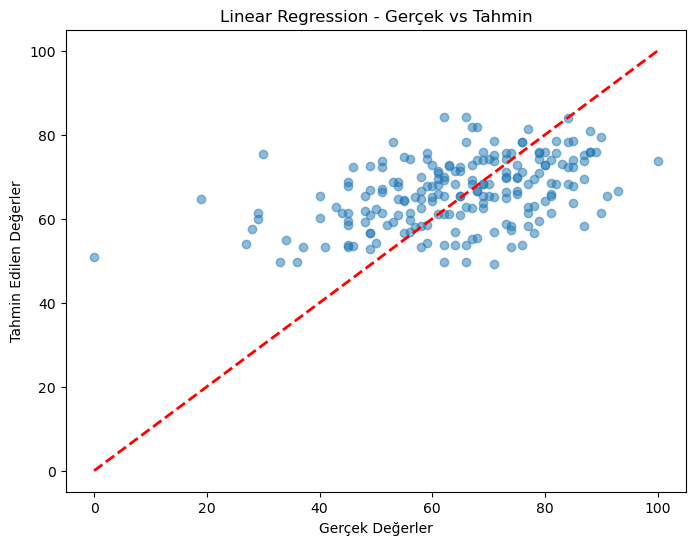


Ridge modeli eğitiliyor...

Ridge Sonuçları:
MSE: 200.5320
RMSE: 14.1609
MAE: 11.2709
R2 Score: 0.1759


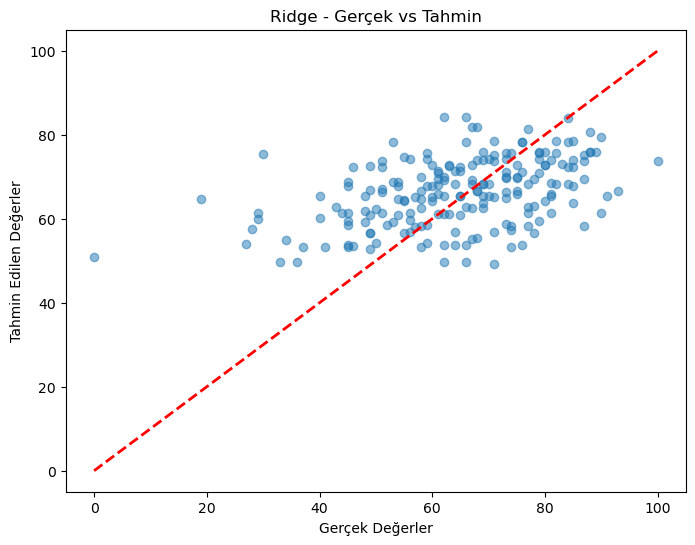


Lasso modeli eğitiliyor...

Lasso Sonuçları:
MSE: 210.9502
RMSE: 14.5241
MAE: 11.4904
R2 Score: 0.1331


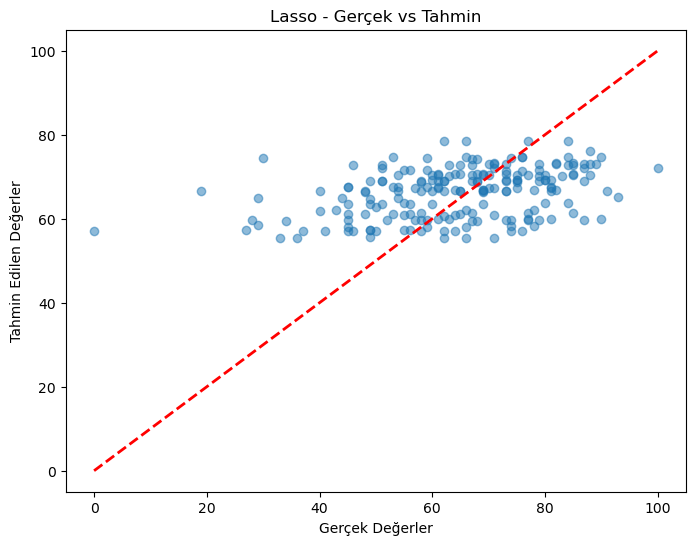


Random Forest modeli eğitiliyor...

Random Forest Sonuçları:
MSE: 247.3313
RMSE: 15.7268
MAE: 12.3942
R2 Score: -0.0164


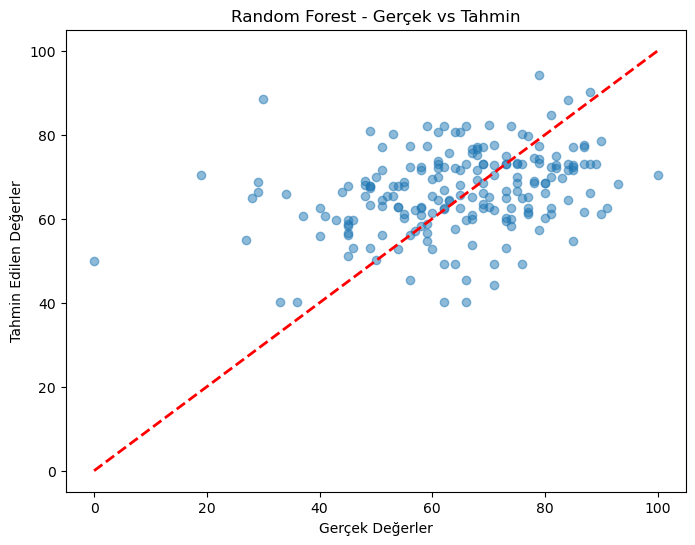


Gradient Boosting modeli eğitiliyor...

Gradient Boosting Sonuçları:
MSE: 217.9138
RMSE: 14.7619
MAE: 11.6100
R2 Score: 0.1045


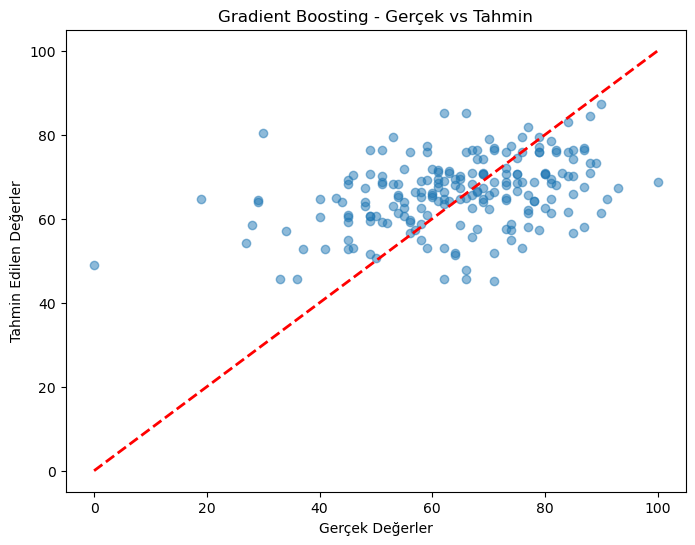


SVR modeli eğitiliyor...

SVR Sonuçları:
MSE: 215.1239
RMSE: 14.6671
MAE: 11.6574
R2 Score: 0.1159


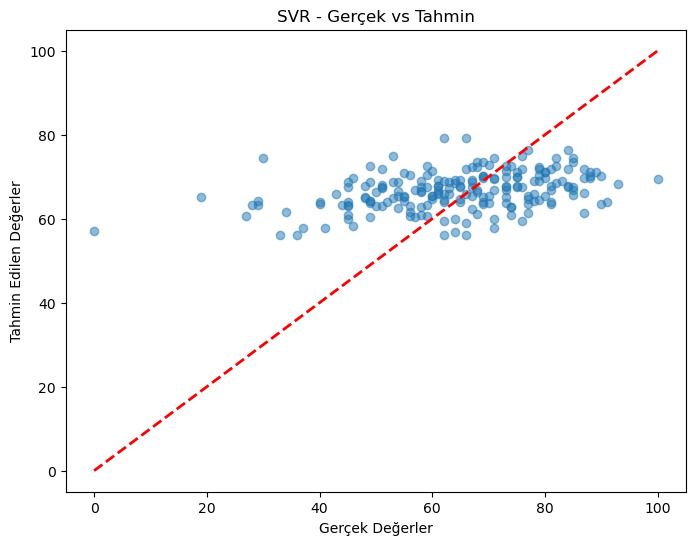

In [43]:
# Modelleri eğitme ve değerlendirme
results = {}
for name, model in models.items():
    print(f"\n{name} modeli eğitiliyor...")
    # Model eğitimi
    model.fit(X_train, y_train)

    # Tahminler
    y_pred = model.predict(X_test)

    # Sonuçları kaydetme
    results[name] = {
        'mse': mean_squared_error(y_test, y_pred),
        'rmse': np.sqrt(mean_squared_error(y_test, y_pred)),
        'mae': mean_absolute_error(y_test, y_pred),
        'r2': r2_score(y_test, y_pred)
    }

    print(f"\n{name} Sonuçları:")
    print(f"MSE: {results[name]['mse']:.4f}")
    print(f"RMSE: {results[name]['rmse']:.4f}")
    print(f"MAE: {results[name]['mae']:.4f}")
    print(f"R2 Score: {results[name]['r2']:.4f}")

    # Gerçek vs Tahmin grafiği
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Gerçek Değerler')
    plt.ylabel('Tahmin Edilen Değerler')
    plt.title(f'{name} - Gerçek vs Tahmin')
    plt.show()

In [44]:
# En iyi modeli bulma (R2 skoruna göre)

best_model_name = max(results.items(), key=lambda x: x[1]['r2'])[0]
print("\nTüm modellerin R2 skorları:")
for name, result in results.items():
    print(f"{name}: {result['r2']:.4f}")
print(f"\nEn iyi model: {best_model_name} (R2 Score: {results[best_model_name]['r2']:.4f})")



Tüm modellerin R2 skorları:
Linear Regression: 0.1760
Ridge: 0.1759
Lasso: 0.1331
Random Forest: -0.0164
Gradient Boosting: 0.1045
SVR: 0.1159

En iyi model: Linear Regression (R2 Score: 0.1760)


In [45]:
# En iyi modeli bulma (MSE skoruna göre)
best_model_name = min(results.items(), key=lambda x: x[1]['mse'])[0]

print("\nTüm modellerin MSE skorları:")
for name, result in results.items():
    print(f"{name}: {result['mse']:.4f}")

print(f"\nEn iyi model: {best_model_name} (MSE: {results[best_model_name]['mse']:.4f})")



Tüm modellerin MSE skorları:
Linear Regression: 200.5108
Ridge: 200.5320
Lasso: 210.9502
Random Forest: 247.3313
Gradient Boosting: 217.9138
SVR: 215.1239

En iyi model: Linear Regression (MSE: 200.5108)


In [46]:
# En iyi modeli bulma (RMSE skoruna göre)
best_model_name = min(results.items(), key=lambda x: x[1]['rmse'])[0]

print("\nTüm modellerin RMSE skorları:")
for name, result in results.items():
    print(f"{name}: {result['rmse']:.4f}")

print(f"\nEn iyi model: {best_model_name} (RMSE: {results[best_model_name]['rmse']:.4f})")



Tüm modellerin RMSE skorları:
Linear Regression: 14.1602
Ridge: 14.1609
Lasso: 14.5241
Random Forest: 15.7268
Gradient Boosting: 14.7619
SVR: 14.6671

En iyi model: Linear Regression (RMSE: 14.1602)
